In [3]:
#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Fetching the dataset
df=pd.read_csv('../Dataset/ accidents_2012_to_2014.csv')
df

C:\Users\Ayush Pratap Singh\AppData\Local\Temp\ipykernel_20152\455028202.py:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../Dataset/accidents_2012_to_2014.csv')


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037,597647,-3.417278,55.264773,98,2,2,1,07-12-2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509,574063,-3.230255,55.054855,98,3,2,2,11-12-2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337,566365,-3.230826,54.985668,98,3,1,1,09-12-2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869,566853,-3.191397,54.990446,98,2,3,2,17-12-2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [5]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

In [7]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,464697.000000,4.646970e+05,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,0.0,464697.000000,464697.000000,464697.000000,464697.000000
mean,443834.284222,2.986258e+05,-1.375156,52.575498,28.504051,2.833461,1.828086,1.334420,4.108740,329.123829,4.070136,1012.728324,38.229793,NaN,2.786293,380.952317,1.337426,2012.928140
std,94098.865933,1.594701e+05,1.382137,1.436370,25.334899,0.402029,0.708703,0.821047,1.916429,259.222621,1.413850,1810.523701,13.800546,NaN,3.187084,1289.786824,0.472832,0.834536
min,65510.000000,1.029000e+04,-7.509162,49.912941,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2012.000000
25%,379059.000000,1.777100e+05,-2.315799,51.484841,6.000000,3.000000,1.000000,1.000000,2.000000,95.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2012.000000
50%,445539.000000,2.606800e+05,-1.323374,52.232169,22.000000,3.000000,2.000000,1.000000,4.000000,300.000000,3.000000,147.000000,30.000000,NaN,3.000000,0.000000,1.000000,2013.000000
75%,525350.000000,3.989590e+05,-0.192935,53.485973,45.000000,3.000000,2.000000,1.000000,6.000000,511.000000,6.000000,759.000000,40.000000,NaN,6.000000,0.000000,2.000000,2014.000000
max,655370.000000,1.190858e+06,1.759382,60.597984,98.000000,3.000000,67.000000,93.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,2.000000,2014.000000


In [8]:
#Checking For Null Values
df.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [9]:
#Checking For nan Values
df.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                               0
Location_Northing_OSGR                              0
Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [10]:
#Preprocessing function
def preProcess(data):
    data=data.drop(["Junction_Detail","Junction_Control"] , axis=1)
    data=data.dropna(axis=0)
    cols_to_remove=['Pedestrian_Crossing-Human_Control','Urban_or_Rural_Area','1st_Road_Class','1st_Road_Number','Road_Type','Pedestrian_Crossing-Physical_Facilities']
    data=data.drop(cols_to_remove ,axis=1)
    return data

In [11]:
#Preprocess the data
df= preProcess(df)
df.isna().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [12]:
#Checking for unique values in a column
df['Light_Conditions'].unique()

array(['Darkness: Street lights present and lit',
       'Daylight: Street light present', 'Darkeness: No street lighting',
       'Darkness: Street lights present but unlit',
       'Darkness: Street lighting unknown'], dtype=object)

In [13]:
df["Weather_Conditions"].unique()

array(['Fine without high winds', 'Raining without high winds', 'Other',
       'Snowing without high winds', 'Raining with high winds',
       'Fine with high winds', 'Unknown', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [14]:
df["Road_Surface_Conditions"].unique()

array(['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

In [45]:
#Custom Encoding Function
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
def encodeData(data):
    data['Light_Conditions']= label_encoder.fit_transform(data['Light_Conditions'])
    data['Weather_Conditions']= label_encoder.fit_transform(data['Weather_Conditions'])
    data['Road_Surface_Conditions']= label_encoder.fit_transform(data['Road_Surface_Conditions'])
    return data

In [46]:
df = encodeData(df)
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,5,0,2,1,0,None,None,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,6,0,2,1,0,None,None,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,6,0,4,1,0,None,None,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,6,0,4,1,0,None,None,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,6,0,2,1,0,None,None,Yes,E01002890,2012


In [17]:
#Convert Time column to datetime
df["Time"]=pd.to_datetime(df["Time"], format='%H:%M').dt.time
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19-01-2012,...,5,0,2,1,0,None,None,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04-01-2012,...,6,0,2,1,0,None,None,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10-01-2012,...,6,0,4,1,0,None,None,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18-01-2012,...,6,0,4,1,0,None,None,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17-01-2012,...,6,0,2,1,0,None,None,Yes,E01002890,2012


In [18]:
df.isna().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

# Feature Extraction

C:\Users\Ayush Pratap Singh\AppData\Local\Temp\ipykernel_20152\858106496.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidths=.5,cmap="YlGnBu" )


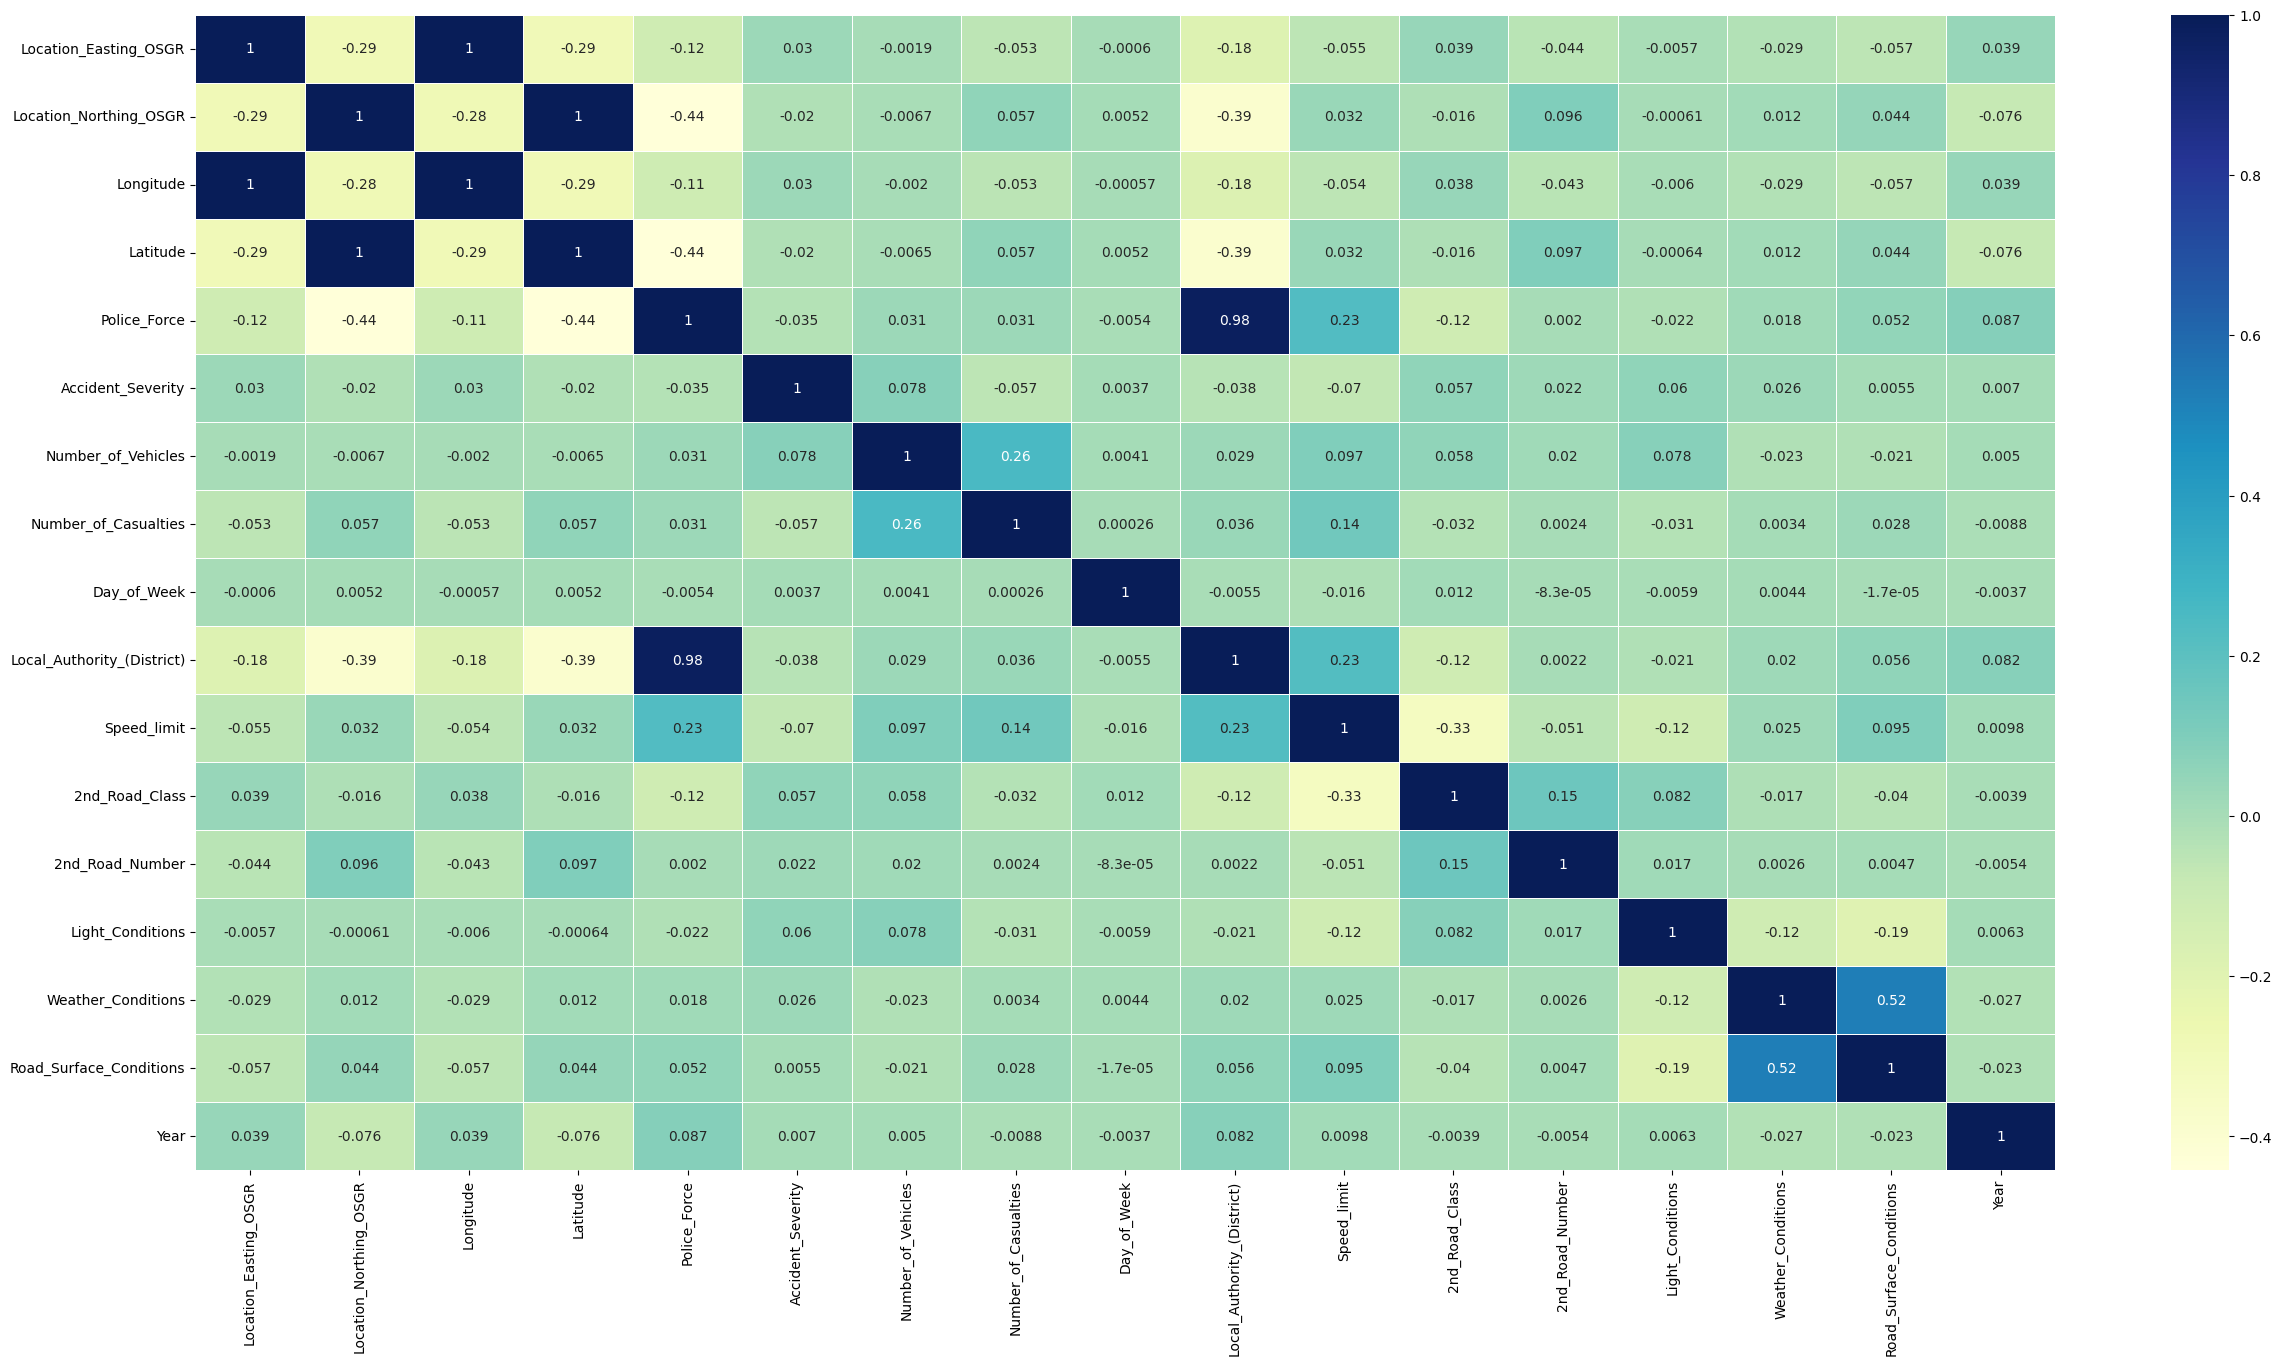

In [19]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,linewidths=.5,cmap="YlGnBu" )
plt.show()

***Features having negative correlation with Accident_Severity do not have significant role in predicting the severity of accident***



In [20]:
x=df[["Location_Easting_OSGR","Location_Northing_OSGR","Longitude","Latitude","Day_of_Week","Speed_limit","2nd_Road_Class","Number_of_Vehicles","Light_Conditions","Weather_Conditions", "Road_Surface_Conditions", "Year"]]
y=df['Accident_Severity']
x.head(5)     

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Day_of_Week,Speed_limit,2nd_Road_Class,Number_of_Vehicles,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Year
0,527200,178760,-0.169101,51.493429,5,30,5,2,2,1,0,2012
1,524930,181430,-0.200838,51.517931,4,30,6,2,2,1,0,2012
2,525860,178080,-0.188636,51.487618,3,30,6,2,4,1,0,2012
3,524980,181030,-0.200259,51.514325,4,30,6,1,4,1,0,2012
4,526170,179200,-0.183773,51.497614,3,30,6,1,2,1,0,2012


# Traing and Testing the Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [22]:
dtc=DecisionTreeClassifier() # Decision Tree Classifier
rfc=RandomForestClassifier(n_estimators=200,criterion="entropy") # Random Forest Classifier
nb=GaussianNB() # Naive Bayes Classifier
lr=LogisticRegression() # Logistic Regression Classifier

In [23]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [24]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [25]:
df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [26]:
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
nb.fit(x_train,y_train)
lr.fit(x_train,y_train)

c:\Users\Ayush Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#Predicting the test set results
de_pred=dtc.predict(x_test)
rf_pred=rfc.predict(x_test)
nb_pred=nb.predict(x_test)
lr_pred=lr.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
# Accuracy Score for Decision Tree Classifier
print("accuracy for decision tree is:{}%".format(accuracy_score(y_test,de_pred)*100))
print(classification_report(y_test,de_pred))

accuracy for decision tree is:77.25622644977483%
              precision    recall  f1-score   support

           1       0.13      0.16      0.14       890
           2       0.28      0.30      0.29     12394
           3       0.88      0.86      0.87     73764

    accuracy                           0.77     87048
   macro avg       0.43      0.44      0.43     87048
weighted avg       0.78      0.77      0.78     87048



In [30]:
print("accuracy for random forest is:{}%".format(accuracy_score(y_test,rf_pred)*100))
print(classification_report(y_test,rf_pred))

accuracy for random forest is:86.30755445271573%
              precision    recall  f1-score   support

           1       0.88      0.14      0.24       890
           2       0.72      0.16      0.27     12394
           3       0.87      0.99      0.92     73764

    accuracy                           0.86     87048
   macro avg       0.82      0.43      0.48     87048
weighted avg       0.85      0.86      0.82     87048



In [31]:
print("accuracy for naive bayes is:{}%".format(accuracy_score(y_test,nb_pred)*100))
print(classification_report(y_test,nb_pred))

accuracy for naive bayes is:83.37698740924547%
              precision    recall  f1-score   support

           1       0.04      0.06      0.05       890
           2       0.20      0.00      0.01     12394
           3       0.85      0.98      0.91     73764

    accuracy                           0.83     87048
   macro avg       0.36      0.35      0.32     87048
weighted avg       0.75      0.83      0.77     87048



In [32]:
print("accuracy for Logistic Regression is:{}%".format(accuracy_score(y_test,lr_pred)*100))
print(classification_report(y_test,lr_pred))

accuracy for Logistic Regression is:84.7394540942928%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       890
           2       0.00      0.00      0.00     12394
           3       0.85      1.00      0.92     73764

    accuracy                           0.85     87048
   macro avg       0.28      0.33      0.31     87048
weighted avg       0.72      0.85      0.78     87048



c:\Users\Ayush Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ayush Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ayush Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

### Voting Classifier


In [33]:
from sklearn.ensemble import VotingClassifier
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=200,criterion="entropy")
nb=GaussianNB()
lr=LogisticRegression()

In [34]:
evc = VotingClassifier( estimators= [('lr',lr),('dtc',dtc),('rfc',rfc),('nb',nb)], voting = 'hard')

In [35]:
evc.fit(x_train,y_train)

c:\Users\Ayush Pratap Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dtc', DecisionTreeClassifier()),
                             ('rfc',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=200)),
                             ('nb', GaussianNB())])

In [36]:
evc.score(x_test,y_test)

0.8639141623012591

In [37]:
pred_evc = evc.predict(x_test)
print("Accuracy of the final voting classifier: {}%".format(round(accuracy_score(y_test, pred_evc)*100,2)))

Accuracy of the final voting classifier: 86.39%


## Testing the Model on Custom Test Data

In [48]:
# Importing the test dataset
test_data = pd.read_csv('../Dataset/test.csv')
# Preprocessing the test dataset
test_data = preProcess(test_data)
test_data = encodeData(test_data)
test_data["Time"]=pd.to_datetime(test_data["Time"], format='%H:%M').dt.time
# Checking for null values
test_data.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [49]:
test_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,2011551D57631,346570,93170,-2.758529,50.735608,55,3,2,1,21/12/2011,...,6,0,3,0,0,None,None,No,E01020500,2011
1,201150JK2H008,274050,38817,-3.767492,50.235825,50,3,1,1,24/08/2011,...,-1,0,1,3,2,None,None,Yes,E01020173,2011
2,2.00936E+12,585320,338420,0.754581,52.911211,36,3,1,1,04/05/2009,...,-1,0,3,0,2,None,None,Yes,E01026646,2009
4,201101FH10295,521750,181250,-0.246709,51.517007,1,3,2,3,01/07/2011,...,6,0,3,0,0,None,None,Yes,E01001875,2011
5,201005EE03883,336040,396570,-2.964848,53.461967,5,3,1,2,22/06/2010,...,6,0,2,0,0,None,None,No,E01006784,2010


In [50]:
# Predicting the test dataset with x and y
x_test_data = test_data[["Location_Easting_OSGR","Location_Northing_OSGR","Longitude","Latitude","Day_of_Week","Speed_limit","2nd_Road_Class","Number_of_Vehicles","Light_Conditions","Weather_Conditions", "Road_Surface_Conditions", "Year"]]
y_test_data = test_data['Accident_Severity']
x_test_data = sc.fit_transform(x_test_data)
y_pred_test_data = evc.predict(x_test_data)

In [52]:
# Accuracy Score for the test dataset
print("accuracy for test data is:{}%".format(accuracy_score(y_test_data,y_pred_test_data)*100))

accuracy for test data is:85.86956521739131%


## Saving the Model

In [54]:
# Saving the model using pickle
import pickle
pickle.dump(evc, open('model.pkl','wb'))